In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import plot_points, plot_decision_boundary

In [2]:
# Data for NAND
X_nand = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_nand = np.array([1, 1, 1, 0])

# Data for NOR
X_nor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_nor = np.array([1, 0, 0, 0])

In [3]:
# Data for XOR
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_xor = np.array([0, 1, 1, 0])

# Data for NOR
X_xnor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]) 
Y_xnor = np.array([1, 0, 0, 1])

In [4]:
# Data preprocessing .
# Data after preprocessing in X : 4 x 3
def preprocess(X : np.ndarray, Y : np.ndarray) :
    n = len(X)
    ret = np.array([[-1, x[0], x[1]] for x in X])
    for i in range(n) :
        k = 1 if Y[i]==1 else -1
        ret[i]*=k  
    
    return ret 

def perceptron_train(Data : np.ndarray) :
    # We need to return the weights
    # Initiate weights to 0, 0, 0
    weights = np.array([0, 0, 0]) 
    count = 0 

    while True:
        count+=1
        found = True
        for X in Data :
            val = np.dot(X, weights)
            if(val>0) : continue
            else :
                found = False
                weights = weights + X 
                break
        if found or count>1000 : break
    
    # return weights
    return weights


# Function for plotting decision boundary
def plot_dec_boundary(X : np.ndarray, Y : np.ndarray):
    preprocessed_data = preprocess(X, Y)
    weights = perceptron_train(preprocessed_data) 

    # plot the graph
    plot_decision_boundary(X, Y, weights) 



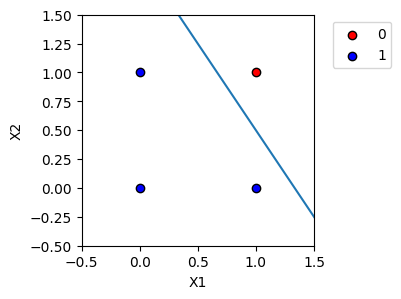

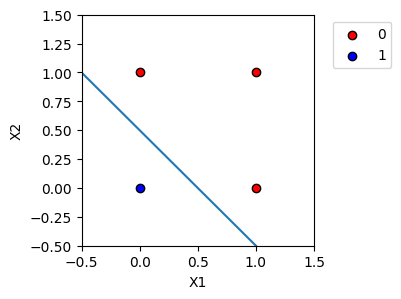

In [5]:
# Plot for NAND and NOR
plot_dec_boundary(X_nand, Y_nand)
plot_dec_boundary(X_nor, Y_nor)

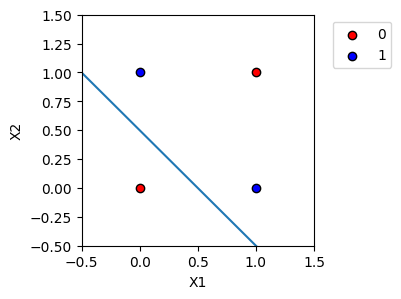

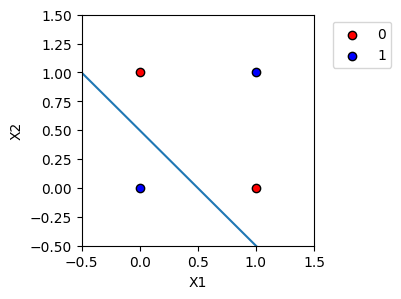

In [6]:
# Plot for XOR and XNOR
plot_dec_boundary(X_xor, Y_xor)
plot_dec_boundary(X_xnor, Y_xnor)

In [13]:
# Sigmoid function 
# It returns sigmoid(net) where net = X.W - theta
def sigmoid(data : np.ndarray, weights : np.ndarray) :
    # Compute X.W - theta
    # weights = (w1, w2, theta)
    net = np.dot(data, weights)
    sigmoid_val = 1/(1+np.exp(-net))
    return sigmoid_val

def MSEloss(y : np.ndarray, y_pred : np.ndarray) :
    return np.sum((y-y_pred)**2)

def BCEloss(y, y_pred) :
    return -(y*np.log(y_pred) + (1-y)*np.log(1-y_pred)) 


# returns the value of gradient of the function at [net]
# net = X.W - theta
def sigmoid_gradient(net) :
    ea = np.exp(net)
    return ea/((1+ea)**2)

# Get the gradients w.r.t w1, w2, theta for back propogation
def get_gradients(Y : np.ndarray, Y_pred : np.ndarray, Data : np.ndarray, weights : np.ndarray):
    # X is Data
    # gradient wrt w1, w2, theta
    net = np.array([np.dot(data, weights) for data in Data])
    coeff = 2*(Y-Y_pred)*sigmoid_gradient(net)
    X1 = np.array([x[0] for x in Data])
    X2 = np.array([x[1] for x in Data])
    gradient_w1 = np.sum(coeff*X1)
    gradient_w2 = np.sum(coeff*X2) 
    gradient_theta = -np.sum(coeff)

    return np.array([gradient_w1, gradient_w2, gradient_theta])



def gradient_descent(Data : np.ndarray, Y : np.ndarray, learning_rate) :
    # weights are w1, w2, theta
    # data is of the form x1, x2, -1
    # y_pred = sigmoid(data, weights)
    # calculate loss using LOSS and back propogate 
    weights = np.array([0, 0, 0])
    while(True) :
        Y_pred = np.array([sigmoid(data, weights) for data in Data])
        Y_new = np.zeros(4) 
        for i in range(4):
            y = Y_pred[i]
            if y<0.1 : Y_new[i] = 0
            elif y>0.9 : Y_new[i] = 1
            else : Y_new[i] = y

        loss = MSEloss(Y, Y_new)

        # If enough precise
        if loss == 0 : break 

        # else apply gradient descent for updating weights 
        gradients = get_gradients(Y, Y_pred, Data, weights)
        weights = weights + learning_rate*gradients
    
    return weights

def plot_decision_boundary_GD(X : np.ndarray, Y : np.ndarray) :
    Data = np.array([[x[0], x[1], -1] for x in X])
    learning_rate = 0.1
    weights = gradient_descent(Data, Y, learning_rate)
    plot_decision_boundary(X, Y, weights)

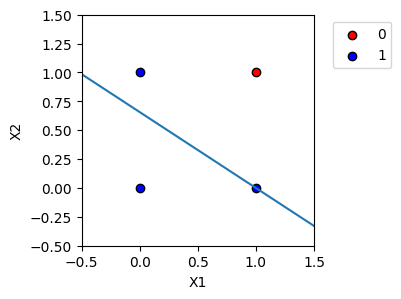

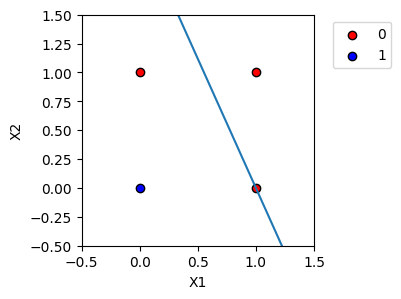

In [14]:
# Plot NAND and NOR using gardient descent
plot_decision_boundary_GD(X_nand, Y_nand)
plot_decision_boundary_GD(X_nor, Y_nor)

In [ ]:
# Plot NAND and NOR using gardient descent
plot_decision_boundary_GD(X_xor, Y_xor)
plot_decision_boundary_GD(X_xnor, Y_xnor)